Importing Libraries

In [21]:
import math as m
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# BSM Model : Pricer and Greeks


Black-Scholes-Merton (BSM) model assumptions:

1. Efficient market: No transaction costs, taxes, or restrictions on short-selling.  
2. Underlying asset: Follows a geometric Brownian motion with constant volatility.  
3. Risk-free rate: Constant and known.  
4. Dividends: No dividends are paid during the option's lifetime.  
5. No arbitrage: Markets prevent risk-free profits.  
6. Option type: The option is European, exercisable only at maturity.  

In [22]:
# Calculation of d1 and d2
def d1(S0, K, T, r, vol):
    return (m.log(S0 / K) + (r + 0.5 * vol**2) * T) / (vol * m.sqrt(T))

def d2(S0, K, T, r, vol):
    return d1(S0, K, T, r, vol) - vol * m.sqrt(T)

# CDF Normal distribution
def N(d):
    return norm.cdf(d)



# 1. Vanilla Option

In [23]:
# CALL pricer and PUT pricer: BSM

def call(S0, K, T, r, vol):
    d1_value = d1(S0, K, T, r, vol)
    d2_value = d2(S0, K, T, r, vol)
    return S0 * norm.cdf(d1_value) - K * m.exp(-r * T) * norm.cdf(d2_value)

def put(S0, K, T, r, vol):
    d1_value = d1(S0, K, T, r, vol)
    d2_value = d2(S0, K, T, r, vol)
    return K * m.exp(-r * T) * norm.cdf(-d2_value) - S0 * norm.cdf(-d1_value)


# Vanilla Option greeks : 

# Delta of a call
def deltaC(S0,K,T,r,vol):
    d1_value = d1(S0,K,T,r,vol)
    return N(d1_value)

# Delta of a put
def deltaP(S0,K,T,r,vol):
    d1_value = d1(S0,K,T,r,vol)
    return N(d1_value)-1

# Gamma of a call and a put
def gamma(S0,K,T,r,vol):
    d1_value=d1(S0,K,T,r,vol)
    return norm.pdf(d1_value)/(S0*vol*m.sqrt(T))

# Vega of a call and a put
def vega(S0,K,T,r,vol):
    d1_value=d1(S0,K,T,r,vol)
    return S0*norm.pdf(d1_value)*m.sqrt(T)

# Theta of a call
def thetaC(S0,K,T,r,vol):
    d1_value=d1(S0,K,T,r,vol)
    d2_value=d1(S0,K,T,r,vol)
    return -S0*norm.pdf(d1_value)*vol/(2*m.sqrt(T))-r*K*m.exp(-r*T)*N(d2_value)

# Theta of a put
def thetaP(S0,K,T,r,vol):
    d1_value=d1(S0,K,T,r,vol)
    d2_value=d1(S0,K,T,r,vol)
    return -S0*norm.pdf(d1_value)*vol/(2*m.sqrt(T))+r*K*m.exp(-r*T)*N(-d2_value)

# Rho of a call
def rhoC(S0,K,T,r,vol):
    d2_value=d2(S0,K,T,r,vol)
    return K*T*m.exp(-r*T)*N(d2_value)

# Rho of a put
def rhoP(S0,K,T,r,vol):
    d2_value=d2(S0,K,T,r,vol)
    return -K*T*m.exp(-r*T)*N(-d2_value)


# Sensitivity curve

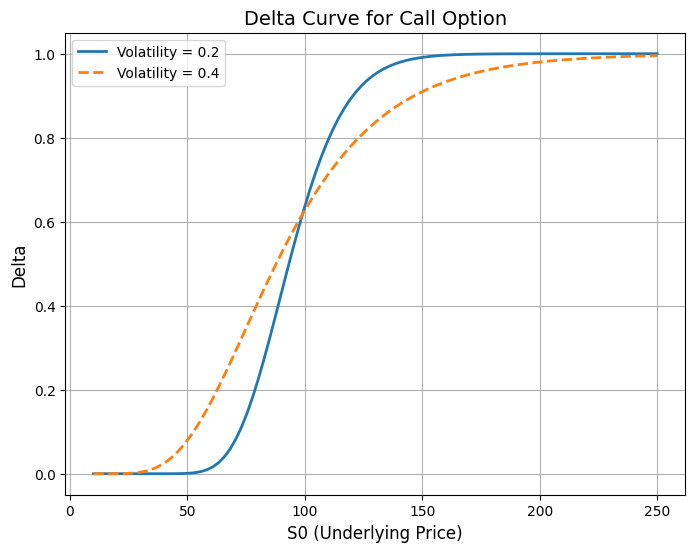

In [30]:
# Delta curve of a call option as a function of So for two different volatilities of the underlying  
vol1 = 0.2
vol2 = 0.4 
S_values = np.linspace(10, 250, 100)  
deltaV1_values = [deltaC(S, 100, 1, 0.05, vol1) for S in S_values]
deltaV2_values = [deltaC(S, 100, 1, 0.05, vol2) for S in S_values]

#Plot the two curves
plt.figure(figsize=(8, 6))
plt.plot(S_values, deltaV1_values, label=f'Volatility = {vol1}', linestyle='-', linewidth=2)
plt.plot(S_values, deltaV2_values, label=f'Volatility = {vol2}', linestyle='--', linewidth=2)

# Add labels and legend
plt.title("Delta Curve for Call Option", fontsize=14)
plt.xlabel("S0 (Underlying Price)", fontsize=12)
plt.ylabel("Delta", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()



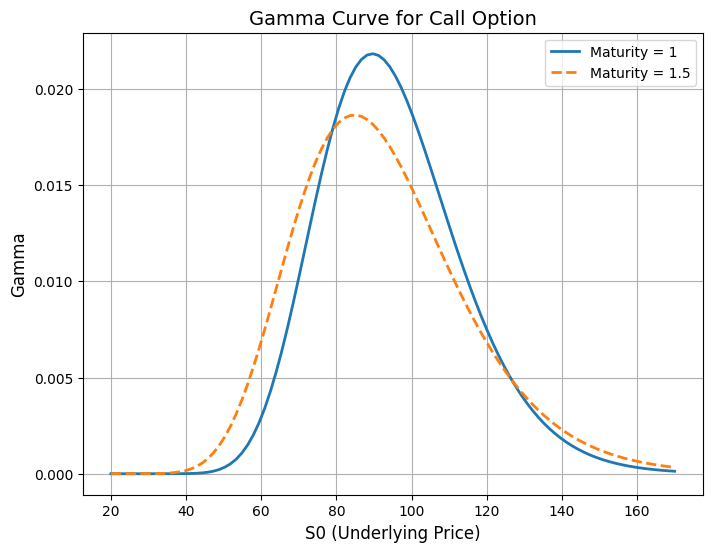

In [ ]:

# Gamma curve of a call option as a function of So for two different maturities
T1 = 1
T2 = 1.5

S_values = np.linspace(20, 170, 100)  
gammaT1_values = [gamma(S, 100, T1, 0.05, 0.2) for S in S_values]
gammaT2_values = [gamma(S, 100, T2, 0.05, 0.2) for S in S_values]

#Plot the two curves
plt.figure(figsize=(8, 6))
plt.plot(S_values, gammaT1_values, label=f'Maturity = {T1}', linestyle='-', linewidth=2)
plt.plot(S_values, gammaT2_values, label=f'Maturity = {T2}', linestyle='--', linewidth=2)

# Add labels and legend
plt.title("Gamma Curve for Call Option", fontsize=14)
plt.xlabel("S0 (Underlying Price)", fontsize=12)
plt.ylabel("Gamma", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()



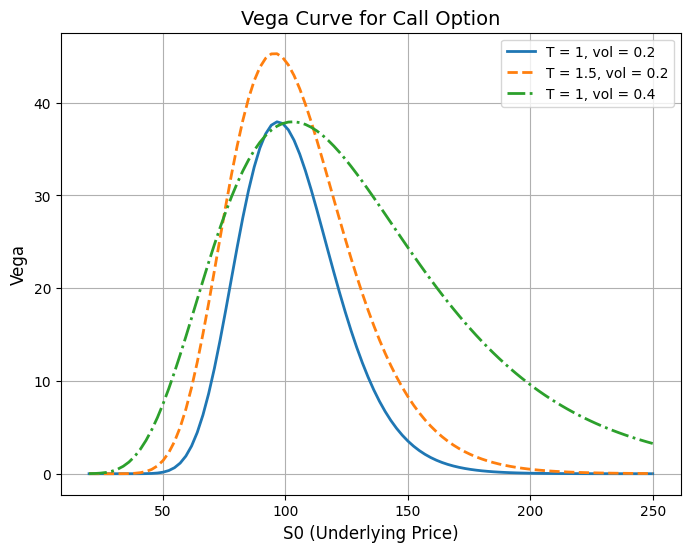

In [38]:
# Vega curve of a call option as a function of So for two different maturities and two different volatilities
T1 = 1
T2 = 1.5
vol1 = 0.2
vol2 = 0.4

S_values = np.linspace(20, 250, 100)  
vegaT1Vol1_values = [vega(S, 100, T1, 0.05, vol1) for S in S_values]
vegaT2Vol1_values = [vega(S, 100, T2, 0.05, vol1) for S in S_values]
vegaT1Vol2_values = [vega(S, 100, T1, 0.05, vol2) for S in S_values]

#Plot the two curves
plt.figure(figsize=(8, 6))
plt.plot(S_values, vegaT1Vol1_values, label=f'T = {T1}, vol = {vol1}', linestyle='-', linewidth=2)
plt.plot(S_values, vegaT2Vol1_values, label=f'T = {T2}, vol = {vol1}', linestyle='--', linewidth=2)
plt.plot(S_values, vegaT1Vol2_values, label=f'T = {T1}, vol = {vol2}', linestyle='-.', linewidth=2)

# Add labels and legend
plt.title("Vega Curve for Call Option", fontsize=14)
plt.xlabel("S0 (Underlying Price)", fontsize=12)
plt.ylabel("Vega", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()


# 2. Compound Option

In [ ]:
# Pricer of compound option ( Call on a Call = CoC, etc) - Assuming the volatility is the same for both options

def CoC(S0,K1,K2,T1,T2,r,vol):
    C_underlying = call(S0,K2,T2,r,vol)
    if T1>T2:
        raise ValueError("The maturity of the compound option T1 must be less than or equal to that of the underlying option T2")
    d1_value = (m.log(C_underlying / K1) + (r + 0.5 * vol**2) * T1) / (vol * m.sqrt(T1))
    d2_value = d1_value - vol * m.sqrt(T1)
    CC = C_underlying * norm.cdf(d1_value) - K1 * m.exp(-r * T1) * norm.cdf(d2_value)
    return CC

def PoP(S0,K1,K2,T1,T2,r,vol):
    P_underlying = put(S0,K2,T2,r,vol)
    if T1>T2:
        raise ValueError("The maturity of the compound option T1 must be less than or equal to that of the underlying option T2")
    d1_value = (m.log(P_underlying / K1) + (r + 0.5 * vol**2) * T1) / (vol * m.sqrt(T1))
    d2_value = d1_value - vol * m.sqrt(T1)
    PP = K1 * m.exp(-r * T1) * norm.cdf(-d2_value)-P_underlying * norm.cdf(-d1_value) 
    return PP


def PoC(S0,K1,K2,T1,T2,r,vol):
    C_underlying = call(S0,K2,T2,r,vol)
    if T1>T2:
        raise ValueError("The maturity of the compound option T1 must be less than or equal to that of the underlying option T2")
    d1_value = (m.log(C_underlying / K1) + (r + 0.5 * vol**2) * T1) / (vol * m.sqrt(T1))
    d2_value = d1_value - vol * m.sqrt(T1)

    PC =K1 * m.exp(-r * T1) * norm.cdf(-d2_value)-C_underlying * norm.cdf(-d1_value) 
    return PC

def CoP(S0,K1,K2,T1,T2,r,vol):
    P_underlying = put(S0,K2,T2,r,vol)
    if T1>T2:
        raise ValueError("The maturity of the compound option T1 must be less than or equal to that of the underlying option T2")

    d1_value = (m.log(P_underlying / K1) + (r + 0.5 * vol**2) * T1) / (vol * m.sqrt(T1))
    d2_value = d1_value - vol * m.sqrt(T1)

    CP = P_underlying * norm.cdf(d1_value) - K1 * m.exp(-r * T1) * norm.cdf(d2_value)
    return CP


# Greeks for Compounds europeans options

def deltaCompC(S0,K1,K2,T1,T2,r,vol):
    delta_underlying= deltaC(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    return N(d1_value)*delta_underlying

def deltaCompP(S0,K1,K2,T1,T2,r,vol):
    delta_underlying= deltaP(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    return N(d1_value)*delta_underlying


def gammaComp(S0,K1,K2,T1,T2,r,vol):
    gamma_underlying= gamma(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    return N(d1_value)*gamma_underlying

def vegaComp(S0,K1,K2,T1,T2,r,vol):
    vega_underlying = vega(S0,K2,T2,r,vol)
    d1_value = d1(S0,K2,T2,r,vol)
    return vega_underlying * S0 * norm.pdf(d1_value)*m.sqrt(T2)


def thetaCompCC(S0,K1,K2,T1,T2,r,vol):
    theta_underlying = thetaC(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    d2_value = d2(S0,K1,T1,r,vol)
    return theta_underlying * N(d1_value)-r*K1*m.exp(-r*T1)*N(d2_value)

def thetaCompCP(S0,K1,K2,T1,T2,r,vol):
    theta_underlying = thetaP(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    d2_value = d2(S0,K1,T1,r,vol)
    return theta_underlying * N(d1_value)-r*K1*m.exp(-r*T1)*N(d2_value)


def thetaCompPC(S0,K1,K2,T1,T2,r,vol):
    theta_underlying = thetaC(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    d2_value = d2(S0,K1,T1,r,vol)
    return theta_underlying * N(d1_value)+r*K1*m.exp(-r*T1)*N(-d2_value)

def thetaCompPP(S0,K1,K2,T1,T2,r,vol):
    theta_underlying = thetaP(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    d2_value = d2(S0,K1,T1,r,vol)
    return theta_underlying * N(d1_value)+r*K1*m.exp(-r*T1)*N(-d2_value)


def rhoCC(S0,K1,K2,T1,T2,r,vol):
    rho_underlying=rhoC(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    d2_value = d2(S0,K1,T1,r,vol)
    return rho_underlying*N(d1_value)+T1*K1*m.exp(-r*T1)*N(d2_value)

def rhoCP(S0,K1,K2,T1,T2,r,vol):
    rho_underlying=rhoP(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    d2_value = d2(S0,K1,T1,r,vol)
    return rho_underlying*N(d1_value)+T1*K1*m.exp(-r*T1)*N(d2_value)

def rhoPC(S0,K1,K2,T1,T2,r,vol):
    rho_underlying=rhoC(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    d2_value = d2(S0,K1,T1,r,vol)
    return rho_underlying*N(d1_value)-T1*K1*m.exp(-r*T1)*N(-d2_value)

def rhoPP(S0,K1,K2,T1,T2,r,vol):
    rho_underlying=rhoP(S0,K2,T2,r,vol)
    d1_value = d1(S0,K1,T1,r,vol)
    d2_value = d2(S0,K1,T1,r,vol)
    return rho_underlying*N(d1_value)-T1*K1*m.exp(-r*T1)*N(-d2_value)

# Test Call Price

In [ ]:
def test_call_price():
    S0, K, T, r, vol = 100, 100, 1, 0.05, 0.2
    return call(S0, K, T, r, vol) 

test_call_price()


np.float64(10.450583572185565)